In [ ]:
#RNN
#21BCE0622
# PART 1  preprocessing

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#import training set

datasettrain =pd.read_csv("/content/Google_Stock_Price_Train.csv")
trainingset =datasettrain.iloc[:,1:2].values
"""
print(trainingset)
"""
#Normaliziation
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range =(0,1))
trainingsetscaled =sc.fit_transform(trainingset)
"""
print(trainingsetscaled)
"""


#Creating a data structure with 60 timesteps and 1 output

Xtrain =[]
Ytrain =[]

for i in range (60,1258):
  Xtrain.append(trainingsetscaled[i-60:i,0])
  Ytrain.append(trainingsetscaled[i,0])

Xtrain, Ytrain = np.array(Xtrain),np.array(Ytrain)

#Reshaping

Xtrain =np.reshape(Xtrain,( Xtrain.shape[0],Xtrain.shape[1],1))



In [ ]:
# PART 2 building RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Initializing RNN
regressor = Sequential()

#adding 1st lstm layer

regressor.add(LSTM(units =50 , return_sequences=True, input_shape =(Xtrain.shape[1],1)))
regressor.add(Dropout(0.3))

#adding 2nd lstm layer
regressor.add(LSTM(units =50 , return_sequences=True, ))
regressor.add(Dropout(0.3))

#adding 3nd lstm layer
regressor.add(LSTM(units =50 , return_sequences=True, ))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units =50 , return_sequences=True, ))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units =50 , return_sequences=True, ))
regressor.add(Dropout(0.3))


#adding 4nd lstm layer
regressor.add(LSTM(units =50 , return_sequences=False, ))
regressor.add(Dropout(0.2))


#Adding output layer


regressor.add(Dense(units =1))

# Compile RNN

regressor.compile(optimizer ='adam',loss ='mean_squared_error')

#Fitting RNN to Training Set

regressor.fit(Xtrain,Ytrain,epochs=100, batch_size =32)

Epoch 1/100
38/38 [==============================] - 20s 210ms/step - loss: 0.0415
Epoch 2/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0082
Epoch 3/100
38/38 [==============================] - 8s 206ms/step - loss: 0.0083
Epoch 4/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0069
Epoch 5/100
38/38 [==============================] - 8s 210ms/step - loss: 0.0068
Epoch 6/100
38/38 [==============================] - 7s 194ms/step - loss: 0.0059
Epoch 7/100
38/38 [==============================] - 7s 185ms/step - loss: 0.0070
Epoch 8/100
38/38 [==============================] - 8s 208ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0056
Epoch 10/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0051
Epoch 11/100
38/38 [==============================] - 7s 175ms/step - loss: 0.0055
Epoch 12/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0050
Epoch 13/100

In [ ]:
#PART 3  VISUALIZING

datasettest =pd.read_csv('/content/Google_Stock_Price_Test.csv')
realstockprice =datasettest.iloc[:,1:2].values
#print(realstockprice)

#getting the predicted stock of jan 2017
datasettotal =pd.concat((datasettrain['Open'],datasettest['Open']),axis = 0)
#gets all inputs we need to predict jan 2017
inputs = datasettotal[len(datasettotal)-len(datasettest)-60 :].values

inputs =inputs.reshape(-1,1)
#print(inputs)
#gotta scale  inputs
inputs= sc.transform(inputs)


Xtest=[]
for i in range (60,80):
  Xtest.append(trainingsetscaled[i-60:i,0])

Xtest = np.array(Xtest)

#get the 3d format


Xtest =np.reshape(Xtest,( Xtest.shape[0],Xtest.shape[1],1))
#print(Xtest)

predictedstockprice=regressor.predict(Xtest)
#print(predictedstockprice)
predictedstockprice = sc.inverse_transform(predictedstockprice)
print(predictedstockprice[:10])
print()
print(sc.inverse_transform(inputs[:10]))

1/1 [==============================] - 4s 4s/step
[[316.41937]
 [317.51947]
 [318.39252]
 [318.73618]
 [318.4564 ]
 [317.6157 ]
 [316.29626]
 [314.6215 ]
 [312.96448]
 [311.7642 ]]

[[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]]


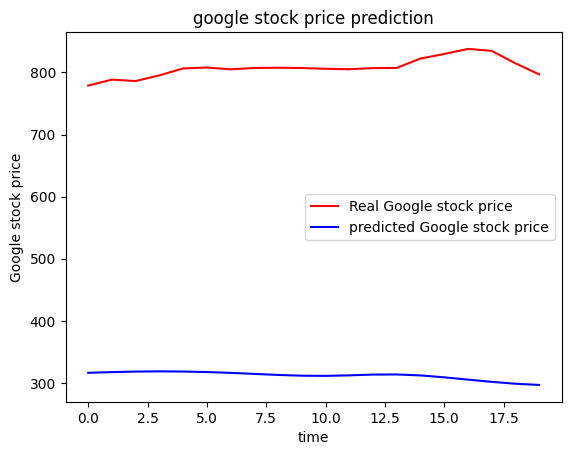

In [ ]:
#visualize
plt.plot(realstockprice,color ='red',label ='Real Google stock price')
plt.plot(predictedstockprice,color ='blue',label ='predicted Google stock price')
plt.title("google stock price prediction")
plt.xlabel("time")
plt.ylabel("Google stock price")
plt.legend()
plt.show()